In [1]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Utility Theory

## Risk Preference
- Risk-aversion: concave utility function, $U^{\prime \prime}(x)<0$
- Risk-seeking: convex utility function, $U^{\prime \prime}(x)>0$
- Risk-neutrality: linear utility function, $U^{\prime}(x)=c$ for a constant $c, U^{\prime \prime}=0$

Suppose you have a logarithmic utility function i.e $U(x)=ln(x)$ and your current wealth is x, x>0. What is the probability p of success that you will need to be indifferent between a certain \\$500,000 and a lottery that pays 0 with probability 1-p and \\$1,000,000 with probability p? Express p as a function of x.

<details>
  <summary>Answer:</summary>
$$
ln(x+.5*10^6)=(1-p)*ln(x)+p*ln(x+10^6)
$$
</details>

# Portfolio Theory

### How to short a stock
- Suppose you want to short stock A, i.e. bet on that its price will go down. 
- In practice, you would contact your broker and express your interest in borrowing one share of stock A. 
- Your broker would find someone that currently owns one share of stock A, and is willing to lend. 
    - The agreement on borrowing/lending is often signed on a daily basis (or less), that is, you are only able to borrow the share for a day and may continue borrowing it only if the owner agrees, where the market circumstance might have changed.
- You would immediately sell the stock you have just borrowed at current price $P_1$. In the case your bet is correct, the stock price would come down to $P_2$, $P_2<P_1$ before you have to return the stock. Then you buy one share of stock A from market, return it to your broker/original owner and make a profit of $P_1-P_2$. 
- Note, the payoff from shorting a stock is exactly $-1 * (P_{new}-P_{old})$, which is $-1*$ payoff from a longing one share of stock A.

## Markowitz Mean-Variance Theory

Given **$n$** number of stocks, and their **return vector** $\mu:=[\mu_1, \mu_2, ..., \mu_n]'$ and **covariance matrix of returns** $C=\left[\begin{array}{cccc}\sigma_{1}^{2} & \sigma_{12} & \ldots & \sigma_{1 n} \\ \sigma_{21} & \sigma_{2}^{2} & \ldots & \sigma_{2 n} \\ \ldots & & & \\ \sigma_{n 1} & \sigma_{n 2} & \ldots & \sigma_{n}^{2}\end{array}\right]$, we need to determine how to form a **portfolio** out of these stocks, that 
1. satisfies a given optimization objective.
2. faces some type of constraint. 

Let $w_i$ denote the weight of stock $i$ in the portfolio, which is the dollar amount in stock i divided by the dollar amount of the entire portfolio

Common objective:
1. minimize $\operatorname{Var}\left[\sum_1^n w_i\mu_i\right]=w'Cw$
2. maximize $\sum_1^n w_i\mu_i-\operatorname{Var}\left[\sum_1^n w_i\mu_i\right]=u'w-w'Cw$

Common constraint:

1. $\sum_1^n w_i=1$, i.e. we do not exceed or fall short of initial capital.
2. $w_i>0, \forall i$, i.e. no short-selling
3. $\mu'w = m$ some constant, i.e return targeting

Mathematically, this is a **constrained optimization** problem. In this context, the only variable that is unknown and need to be solved is $w=[w_1, w_2, ..., w_n]'$

## Lagrange Multiplier

Clear and intuitive visualization from Khan Academy [here](https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/lagrange-multipliers-and-constrained-optimization/v/constrained-optimization-introduction)

Another great explanation and examples in writing [here](https://tutorial.math.lamar.edu/classes/calciii/lagrangemultipliers.aspx)

$$
\operatorname{max}f(x,y)=x^2y
$$ given
$$
x^2+y^2=1
$$


Key intuitions:
1. a contour line denotes all pairs of (x,y) such that f(x,y)=c, c some constant. 
2. max/min points are at where the constraint line barely touches the contour line
2. in other words, the gradient direction that results in the largest change in function value is perpendicular to the contour line

$$
\nabla f = \lambda \nabla g
$$

In [25]:
delta = 0.0025
w_1 = np.arange(-2, 2, delta)
w_2 = np.arange(-2, 2, delta)
W_1, W_2 = np.meshgrid(w_1, w_2)

In [26]:
sigma1, sigma2, rho = 1, 1, 0.5
Z = [(w_1*sigma1)**2+(w_2*sigma2)**2+2*w_1*w_2*rho*sigma1*sigma2 for w_1, w_2 in zip(W_1, W_2)]

(-2, 2)

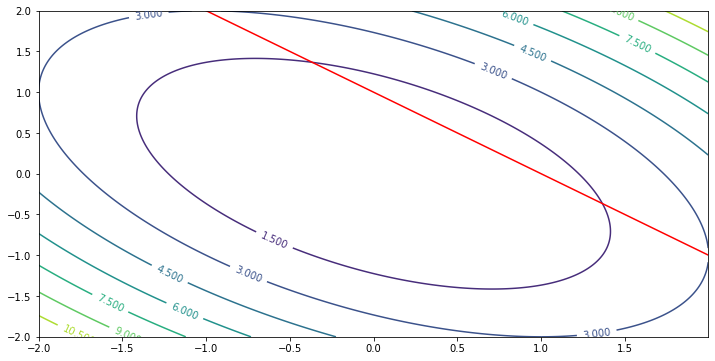

In [48]:
fig, ax = plt.subplots(figsize=(12,6))
CS = ax.contour(W_1, W_2, Z)
ax.clabel(CS, inline=1, fontsize=10)

ax.plot(w_1, 1-w_1, alpha=1, color='red')
ax.set_ylim(-2, 2)

#### Practice (interview) Problem

Find the maximum and minimum of $f(x, y)=5 x-3 y$ subject to the constraint $x^{2}+y^{2}=136$.

<details>
  <summary>Answer:</summary>
Here is the system that we need to solve.
\[
\begin{aligned}
5 &=2 \lambda x \\
-3 &=2 \lambda y \\
x^{2}+y^{2} &=136
\end{aligned}
\]
Since it's clear that $\lambda \neq 0$, we can solve the first two equations for $x$ and $y$ respectively. This gives,
\[
x=\frac{5}{2 \lambda} \quad y=-\frac{3}{2 \lambda}
\]
Plugging these into the constraint gives,
\[
\frac{25}{4 \lambda^{2}}+\frac{9}{4 \lambda^{2}}=\frac{17}{2 \lambda^{2}}=136
\]
We can solve this for $\lambda$
\[
\lambda^{2}=\frac{1}{16} \quad \Rightarrow \quad \lambda=\pm \frac{1}{4}
\]
Now, that we know $\lambda$ we can find the points that will be potential maximums and/or minimums.
If $\lambda=-\frac{1}{4}$ we get,
\[
x=-10 \quad y=6
\]
and if $\lambda=\frac{1}{4}$ we get,
\[
x=10 \quad y=-6
\]
To determine if we have maximums or minimums we just need to plug these into the function. Here are the minimum and maximum values of the function.
\[
\begin{array}{ll}
f(-10,6)=-68 & \text { Minimum at }(-10,6) \\
f(10,-6)=68 & \text { Maximum at }(10,-6)
\end{array}
\]
</details>


### Multiple constraints
$$
\operatorname{Minimize}\sigma_{P}^{2}=\mathbf{w}^{T} \mathbf{C} \mathbf{w}
$$
Subject to 
$$\boldsymbol{\mu}^{T} \mathbf{w}=\mu, \quad \mathbf{u}^{T} \mathbf{w}=1
$$

Let lagrangian be
$$
L(x, y, \lambda, \mu)=f(x, y)+\lambda_1 g(x, y)+\lambda_2 h(x, y)
$$
and solve for
$$
0 = \nabla L(x, y, \lambda, \mu)=\nabla f(x, y)+\lambda_1 \nabla g(x, y)+\lambda_2 \nabla h(x, y)
$$

#### Practice (Interview) Problem

Find the maximum and minimum of $f(x, y, z)=4 y-2 z$ subject to the constraints $2 x-y-z=2$ and $x^{2}+y^{2}=1$. You only need to list the system of equations we need to solve for.

<details>
  <summary>Answer:</summary>
$$
\begin{array}{cc}0=2 \lambda+2 \mu x & \left(f_{x}=\lambda g_{x}+\mu h_{x}\right) \\ 4=-\lambda+2 \mu y & \left(f_{y}=\lambda g_{y}+\mu h_{y}\right) \\ -2=-\lambda & \left(f_{z}=\lambda g_{z}+\mu h_{z}\right) \\ 2 x-y-z=2 \\ x^{2}+y^{2}=1\end{array}
$$
    </details>